In [1]:
import numpy as np

In [23]:
class MultipleLinearRegression:
    
    def __init__(self):
        self.coefficient = None
        self.intercept = None
        
        
    def fit(self, X, y):
        
        X = np.insert(X, 0, 1, axis = 1)
        
        slop_values = np.linalg.inv(X.T @ X) @ (X.T @ y)
        
        self.intercept = slop_values[0]
        self.coefficient = slop_values[1:]
        
    
    def predict(self, X):
        
        # y = m0 + m1x1 + m2x2 + m3x3 + m4x4 ........... + mnxn
        # y = [m1 m2 m3 m4 .......... mn] X [x1 x2 x3 x4 .............. xn] + m0
        
        return X @ self.coefficient + self.intercept
    
        

# Data Generation

In [101]:
np.random.seed(42)

no_rows = 1000000
no_features = 100

X = np.random.rand(no_rows, no_features) * 10000
y = np.random.rand(no_rows, 1) * 1000

In [102]:
X

array([[3745.40118847, 9507.1430641 , 7319.93941811, ..., 4275.41018359,
         254.19126744, 1078.91426993],
       [ 314.29185687, 6364.10411264, 3143.55981076, ..., 8971.10259953,
        8870.86424265, 7798.75545858],
       [6420.31646154,  841.39964995, 1616.28714095, ..., 2158.21027497,
        6228.90475819,  853.47464994],
       ...,
       [7454.35617898, 7928.22870997, 9713.03252787, ..., 9745.90781376,
        8102.15111089, 7204.20133291],
       [6073.1978882 , 4861.14578751, 3149.71335937, ..., 6390.14678814,
        5823.6383945 , 6640.79824981],
       [6205.90435827, 7092.62348722, 5636.29889253, ..., 3752.06579605,
        5914.03236829, 3531.58181075]])

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=23)

In [105]:
lgModel = MultipleLinearRegression()

In [106]:
lgModel.fit(X_train, y_train)

In [107]:
y_pred = lgModel.predict(X_test)

In [108]:
from sklearn.metrics import r2_score

In [109]:
r2_score(y_test, y_pred)

-9.295240282392037e-05

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
skModel = LinearRegression()

In [112]:
skModel.fit(X_train, y_train)

LinearRegression()

In [113]:
y_pred_sk = skModel.predict(X_test)

In [114]:
r2_score(y_test, y_pred_sk)

-9.29524028245865e-05

In [115]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

def compare_models(model1, model2, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # Model 1
    start_time = time.time()
    model1.fit(X_train, y_train)
    model1_train_time = time.time() - start_time

    start_time = time.time()
    model1_pred = model1.predict(X_test)
    model1_test_time = time.time() - start_time

    model1_r2 = r2_score(y_test, model1_pred)

    # Model 2
    start_time = time.time()
    model2.fit(X_train, y_train)
    model2_train_time = time.time() - start_time

    start_time = time.time()
    model2_pred = model2.predict(X_test)
    model2_test_time = time.time() - start_time

    model2_r2 = r2_score(y_test, model2_pred)

    return {
        'Num Samples': len(X),
        'Num Features': len(X[0]),
        'Model 1 Train Time (s)': round(model1_train_time, 4),
        'Model 1 Test Time (s)': round(model1_test_time, 4),
        'Model 1 R2': round(model1_r2, 4),
        'Model 2 Train Time (s)': round(model2_train_time, 4),
        'Model 2 Test Time (s)': round(model2_test_time, 4),
        'Model 2 R2': round(model2_r2, 4)
    }


In [116]:
model1 = MultipleLinearRegression()
model2 = LinearRegression()

In [125]:
input_size = 10000
no_features = 40
results = []

for i in range(10):
    temp_features = no_features
    for j in range(5):
        X = np.random.rand(input_size, temp_features) * 1e6
        y = np.random.rand(input_size, 1) * 1e6
        y = y.ravel()  
        
        metrics = compare_models(model1, model2, X, y)
        results.append(metrics)

        temp_features += 5
    input_size *= 2

In [128]:
import pandas as pd

df_results = pd.DataFrame(results)

In [129]:
df_results

,Num Samples,Num Features,Model 1 Train Time (s),Model 1 Test Time (s),Model 1 R2,Model 2 Train Time (s),Model 2 Test Time (s),Model 2 R2
0,10000,40,0.0871,0.0000,-0.0053,0.1683,0.0005,-0.0053
1,10000,45,0.0159,0.0000,-0.0084,0.1910,0.0041,-0.0084
2,10000,50,0.0070,0.0000,-0.0048,0.3472,0.0019,-0.0048
3,10000,55,0.0194,0.0000,-0.0055,0.6839,0.0020,-0.0055
4,10000,60,0.0169,0.0000,-0.0040,0.6762,0.0020,-0.0040
5,20000,40,0.0092,0.0000,-0.0037,0.5699,0.0022,-0.0037
6,20000,45,0.0256,0.0000,-0.0021,0.3621,0.0020,-0.0021
7,20000,50,0.0309,0.0000,-0.0049,0.2622,0.0010,-0.0049
8,20000,55,0.0112,0.0010,-0.0018,0.3504,0.0010,-0.0018
9,20000,60,0.0489,0.0010,-0.0047,0.5094,0.0020,-0.0047


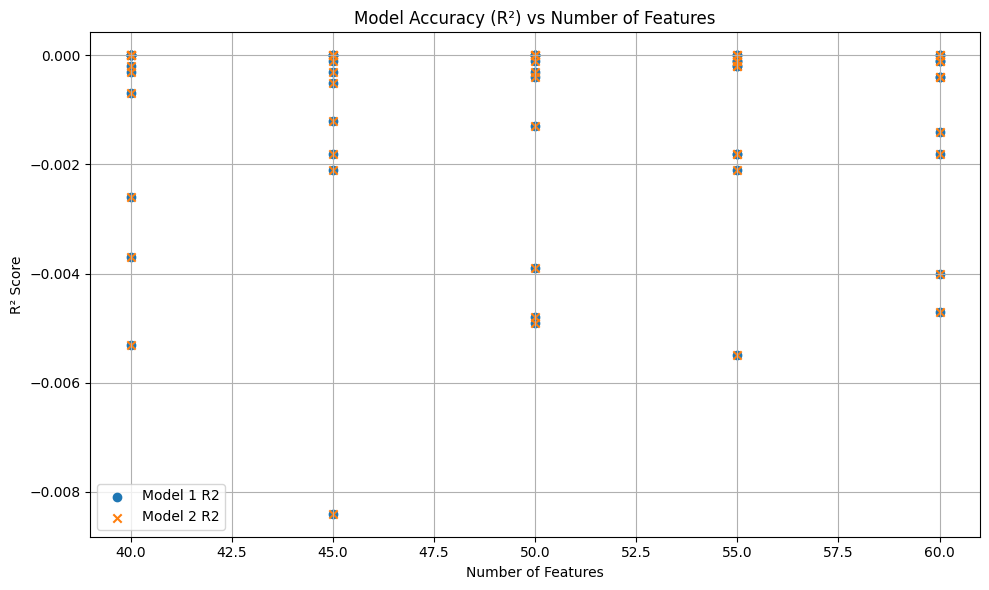

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_results['Num Features'], df_results['Model 1 R2'], label='Model 1 R2', marker='o')
plt.scatter(df_results['Num Features'], df_results['Model 2 R2'], label='Model 2 R2', marker='x')

plt.xlabel("Number of Features")
plt.ylabel("R² Score")
plt.title("Model Accuracy (R²) vs Number of Features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


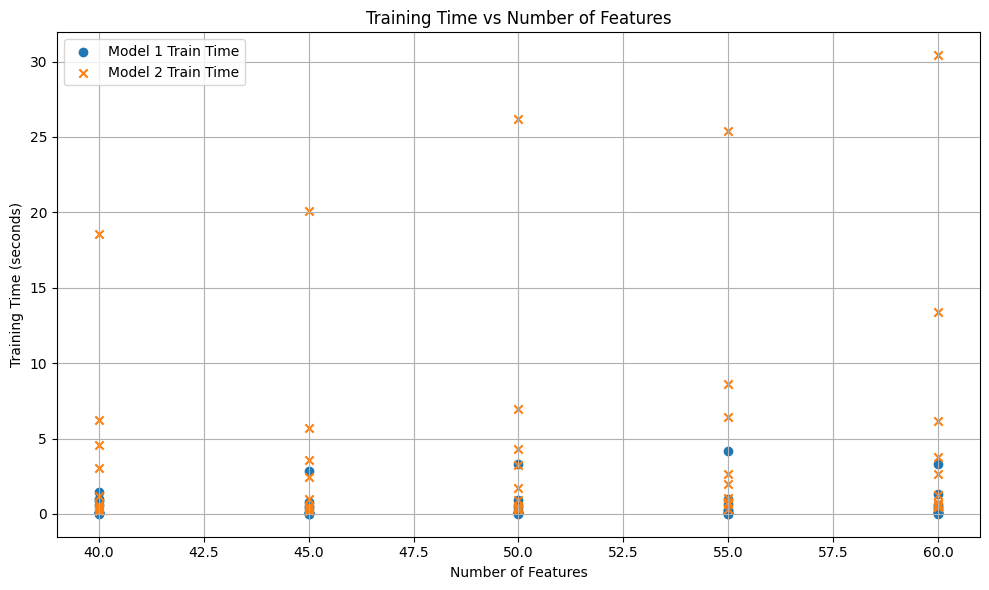

In [131]:
plt.figure(figsize=(10, 6))
plt.scatter(df_results['Num Features'], df_results['Model 1 Train Time (s)'], label='Model 1 Train Time', marker='o')
plt.scatter(df_results['Num Features'], df_results['Model 2 Train Time (s)'], label='Model 2 Train Time', marker='x')

plt.xlabel("Number of Features")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time vs Number of Features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
